# OCR Cookbook

---

## OCR Exploration and Structured Outputs
In this cookbook, we will explore the basics of OCR and leverage it together with existing models to achieve structured outputs fueled by our OCR model.

You may want to do this in case current vision models are not powerful enough, hence enhancing their vision OCR capabilities with the OCR model to achieve better structured data extraction.

---

### Used
- Mistral OCR
- Pixtral 12B & Ministral 8B


### Setup
First, let's install `mistralai` and download the required files.

In [2]:
!pip install mistralai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.3/278.3 kB 7.1 MB/s eta 0:00:00


In [1]:
!wget https://raw.githubusercontent.com/mistralai/cookbook/refs/heads/main/mistral/ocr/mistral7b.pdf
!wget https://raw.githubusercontent.com/mistralai/cookbook/refs/heads/main/mistral/ocr/receipt.png

--2025-03-11 04:13:41--  https://raw.githubusercontent.com/mistralai/cookbook/refs/heads/main/mistral/ocr/mistral7b.pdf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3749788 (3.6M) [application/octet-stream]
Saving to: ‘mistral7b.pdf’

mistral7b.pdf       100%[===================>]   3.58M  --.-KB/s    in 0.09s   

2025-03-11 04:13:41 (39.7 MB/s) - ‘mistral7b.pdf’ saved [3749788/3749788]

--2025-03-11 04:13:41--  https://raw.githubusercontent.com/mistralai/cookbook/refs/heads/main/mistral/ocr/receipt.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting res

We can now set up our client. You can create an API key on our [Plateforme](https://console.mistral.ai/api-keys/).

In [10]:
from mistralai import Mistral

api_key = "joYYz96T9EB60ksCYhoVoz44h0NP9Ld6"
client = Mistral(api_key=api_key)

There are two types of files you can apply OCR to:
- PDF files, either uploaded or from URLs...

In [14]:
from pathlib import Path

pdf_file = Path("test2.pdf")
assert pdf_file.is_file()

{
    "pages": [
        {
            "index": 0,
            "markdown": "# 2024 \u5e74 12 \u6708 03 \u65e5 | \u4e2d\u56fd\u5185\u5730 \n\n| \u5584\u7855 | \u8d64\u535a\u6210 | \u80e1\u674e\u9e64, PhD |\n| :-- | :-- | :-- |\n| \u65f6\u4ee3\u65e5 | \u65f6\u4ee3\u65e5 | \u77e5\u540d\u4eba |\n| SAC No. 50570520100005 | SAC No. 50570524110003 | SAC No. 50570122120062 |\n| SFC No. AMH263 | qibocheng@htsc.com | huilpeng@htsc.com |\n| evayi@htsc.com | $+(86) 2128972228$ | $+(86) 1063211166$ |\n\n\u8fd0\u671f\u65e5\u5143\u660e\u663e\u5347\u503c\uff0c\u5e76\u4e14\u8d70\u51fa\u72ec\u7acb\u8d8b\u52bf\u3002\u8fc7\u53bb 2-3\u5468\uff0c\u65e5\u5143\u5bf9\u7f8e\u5143\u6c47\u7387\u7d2f\u8ba1\u5347\u503c $4.2 \\%$ \u81f3 149.9 \u65e5\u5143/\u7f8e\u5143\uff0c\u5347\u7834 150\u7684\u5173\u952e\u70b9\u4f4d\uff0c\u800c\u540c\u671f\u6b27\u5143\u3001\u97e9\u5143\u5bf9\u7f8e\u5143\u5206\u522b\u8d2c\u503c $0.4 \\% \u3001 0.2 \\%$ \uff0c\u4eba\u6c11\u5e01\u4f4e\u4f4d\u9707\u8361\u3002\u65e5\u5143\u5bf9\u4e00\
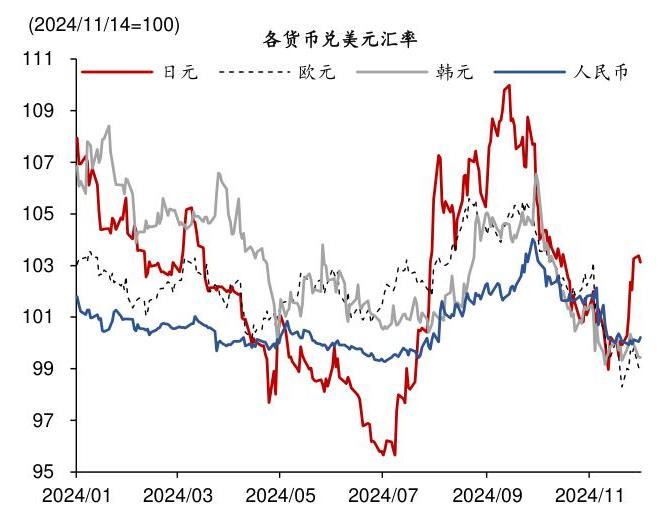
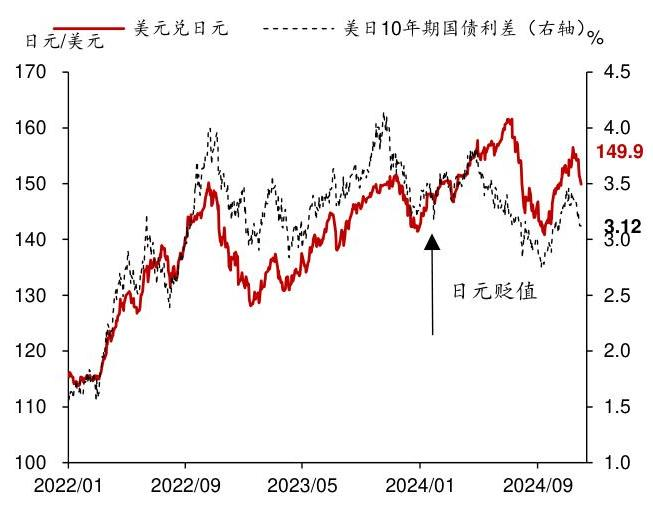
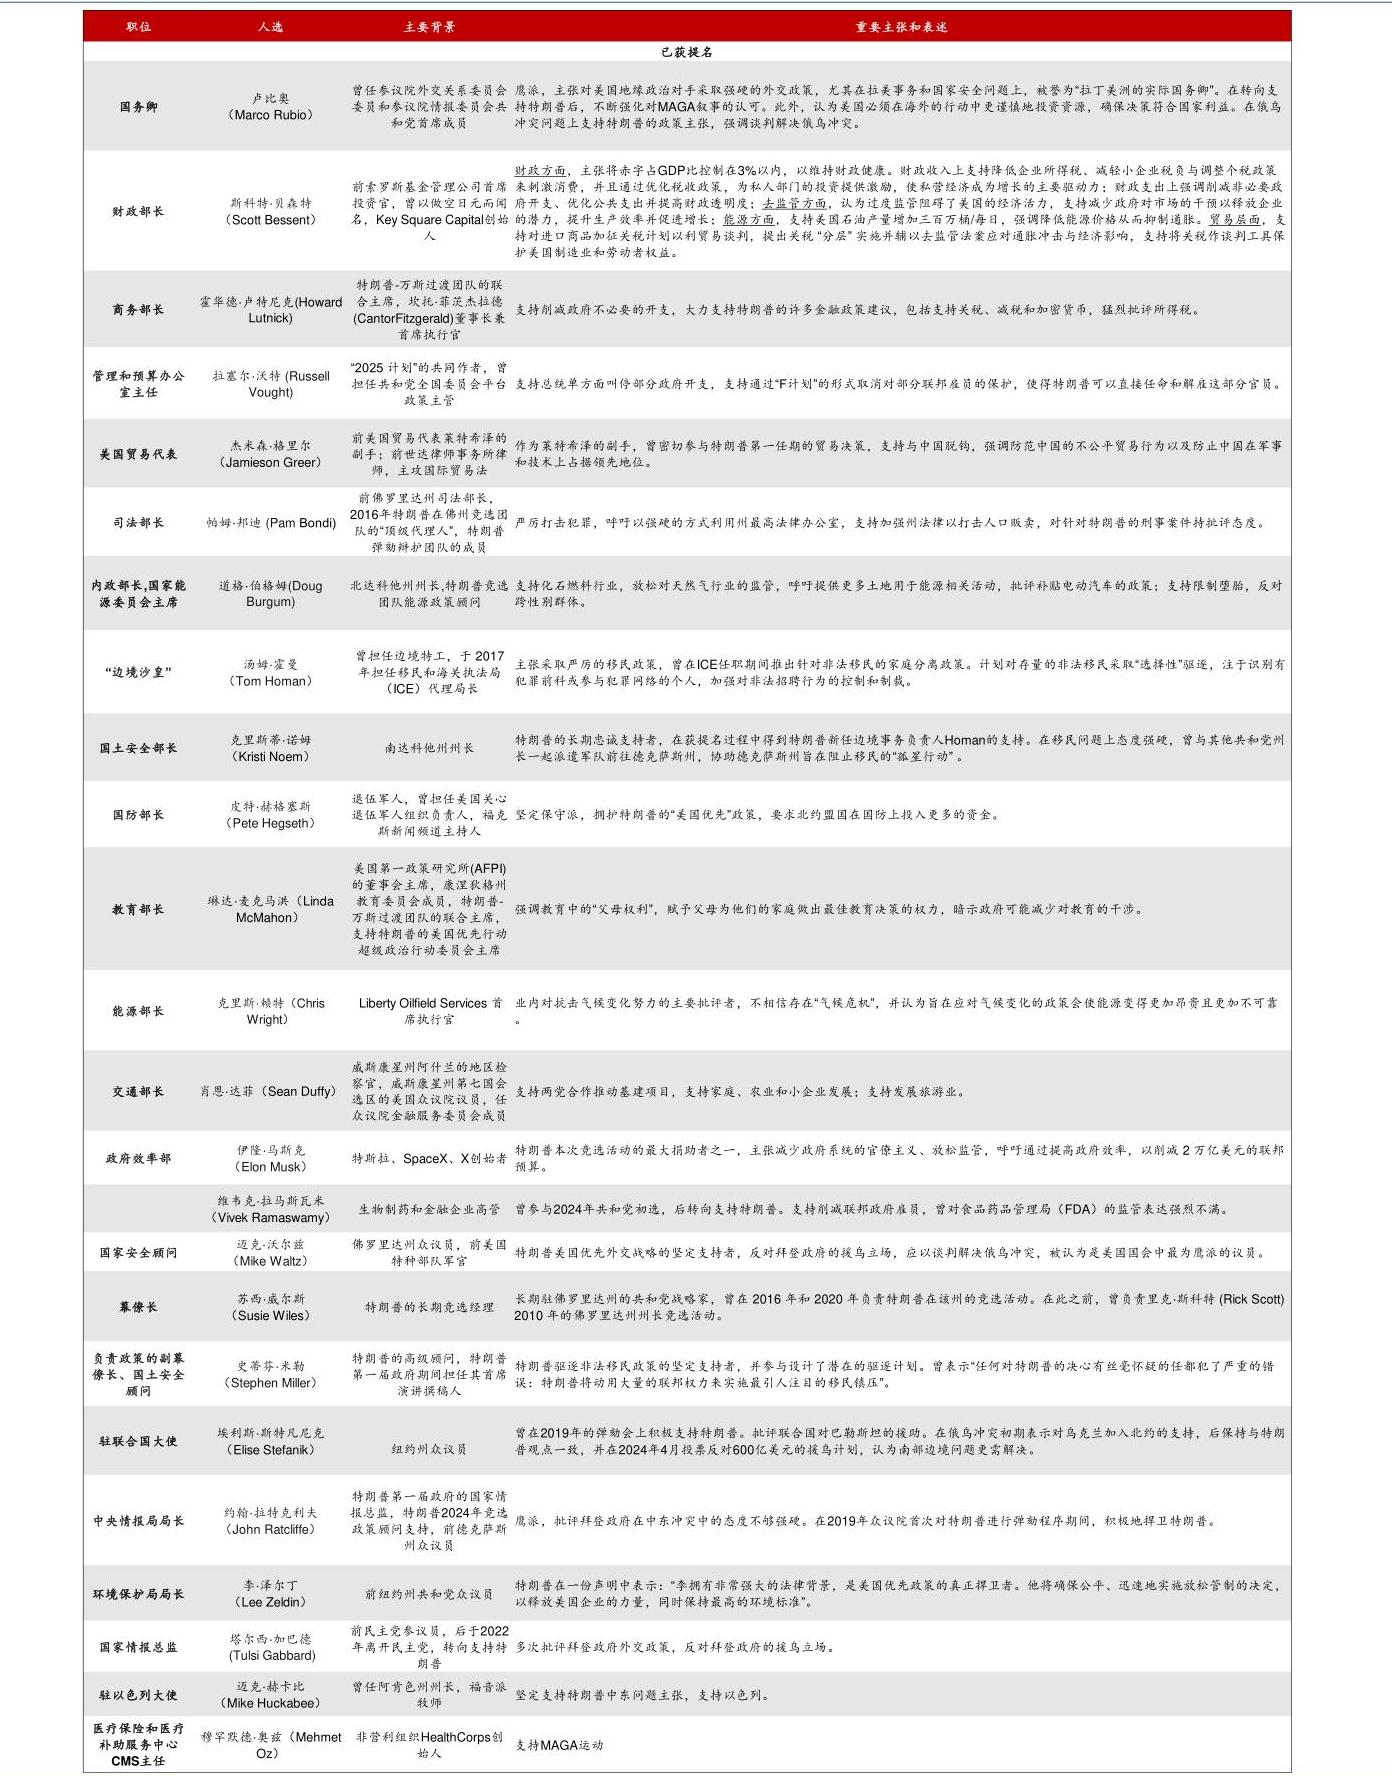
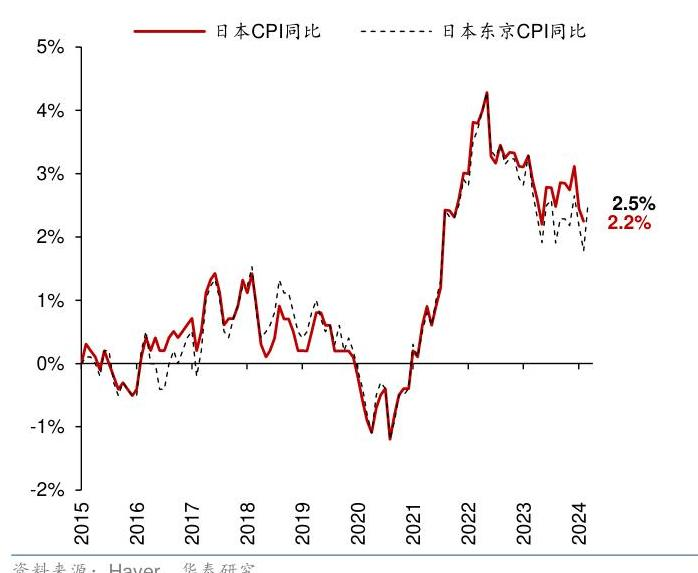
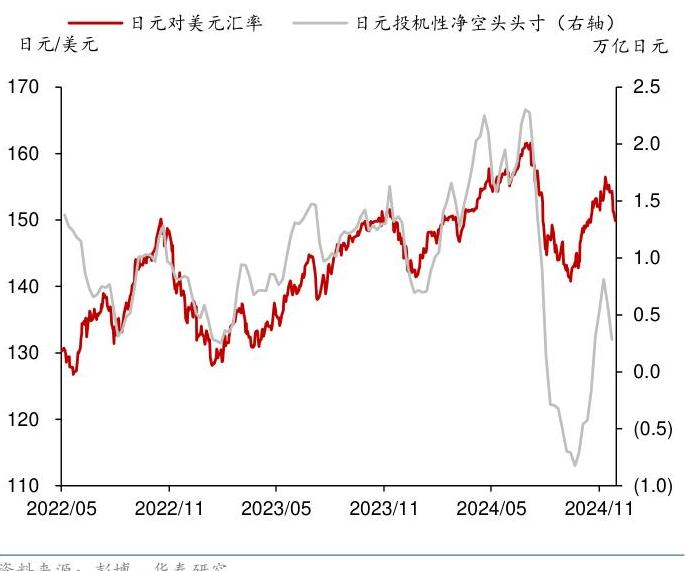

<ipython-input-15-793982fc17e2>:16: PydanticDeprecatedSince20: The `json` method is deprecated; use `model_dump_json` instead. Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.10/migration/
  response_dict = json.loads(pdf_response.json())


In [15]:
from mistralai import DocumentURLChunk, ImageURLChunk, TextChunk
import json

uploaded_file = client.files.upload(
    file={
        "file_name": pdf_file.stem,
        "content": pdf_file.read_bytes(),
    },
    purpose="ocr",
)

signed_url = client.files.get_signed_url(file_id=uploaded_file.id, expiry=1)

pdf_response = client.ocr.process(document=DocumentURLChunk(document_url=signed_url.url), model="mistral-ocr-latest", include_image_base64=True)

response_dict = json.loads(pdf_response.json())
json_string = json.dumps(response_dict, indent=4)
print(json_string)

*The OCR model can output interleaved text and images (set `include_image_base64=True` to return the base64 image ), we can view the result with the following:*

{'pages': [{'index': 0,
   'markdown': '# 2024 年 12 月 03 日 | 中国内地 \n\n| 善硕 | 赤博成 | 胡李鹤, PhD |\n| :-- | :-- | :-- |\n| 时代日 | 时代日 | 知名人 |\n| SAC No. 50570520100005 | SAC No. 50570524110003 | SAC No. 50570122120062 |\n| SFC No. AMH263 | qibocheng@htsc.com | huilpeng@htsc.com |\n| evayi@htsc.com | $+(86) 2128972228$ | $+(86) 1063211166$ |\n\n运期日元明显升值，并且走出独立趋势。过去 2-3周，日元对美元汇率累计升值 $4.2 \\%$ 至 149.9 日元/美元，升破 150的关键点位，而同期欧元、韩元对美元分别贬值 $0.4 \\% 、 0.2 \\%$ ，人民币低位震荡。日元对一篮子货币也升值 $4.2 \\%$ （截至 11 月 29 日）。我们的分析表明，日本经济基本面、政策面和技术面均支持日元反弹。往前看，2025年日本经济反将延续复苏态势，日央行货币政策将进一步正常化，考虑到日本经济周期的"独立性"以及日元的避险属性，日元及相关资产反均有悉联表现。\n\n多重因素带动美日利美收容并推升日元。近期美日利美明显收容，较11月高点回落累计 30bp 至 $3.12 \\%$ （截至 12 月 2日），日元明显走弱（图表 2）。美日利美收容同时受到美国和日本的多个数据及事件的驱动：\n\n1）美国部分新提名内阁成员传递出限制财政扩张的信号，降低市场对美国财政扩张预期，带动美债高位回撤。马斯克、美国财长候选人员森特以及商务部长卢特尼克均支持削减联邦开支，减少政府浪费（图表 3），见森特还主张将赤字占 GDP 比例控制在 $3 \\%$ 以内，部分缓解了市场对美国财政可持续性的担忧。美国10年期因债收益率快速下行，从 11 月 13 日的 $4.45 \\%$ 回落 25 bp 至 12 月 2 日的 $4.20 \\%$ 。\n2）但更为重要的是，日本经济基本面、政策面和技术面均支持日元反弹。从经济基本面看，10月日本核心 CPI（削
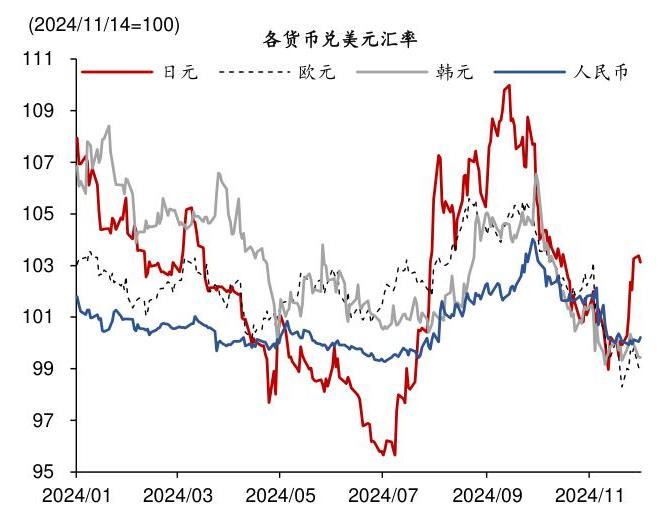
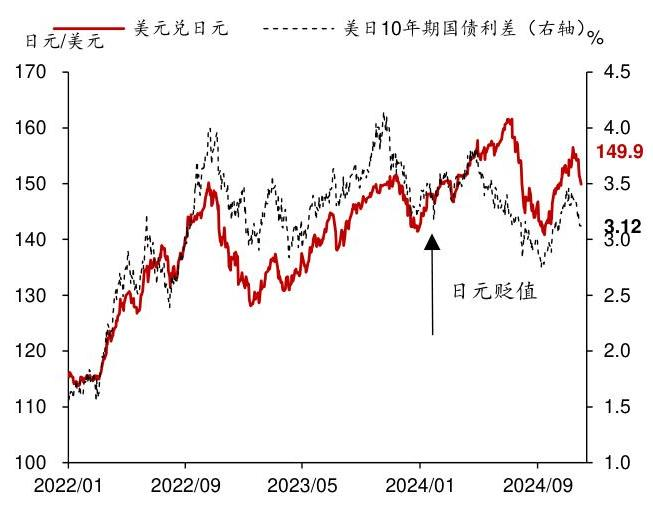
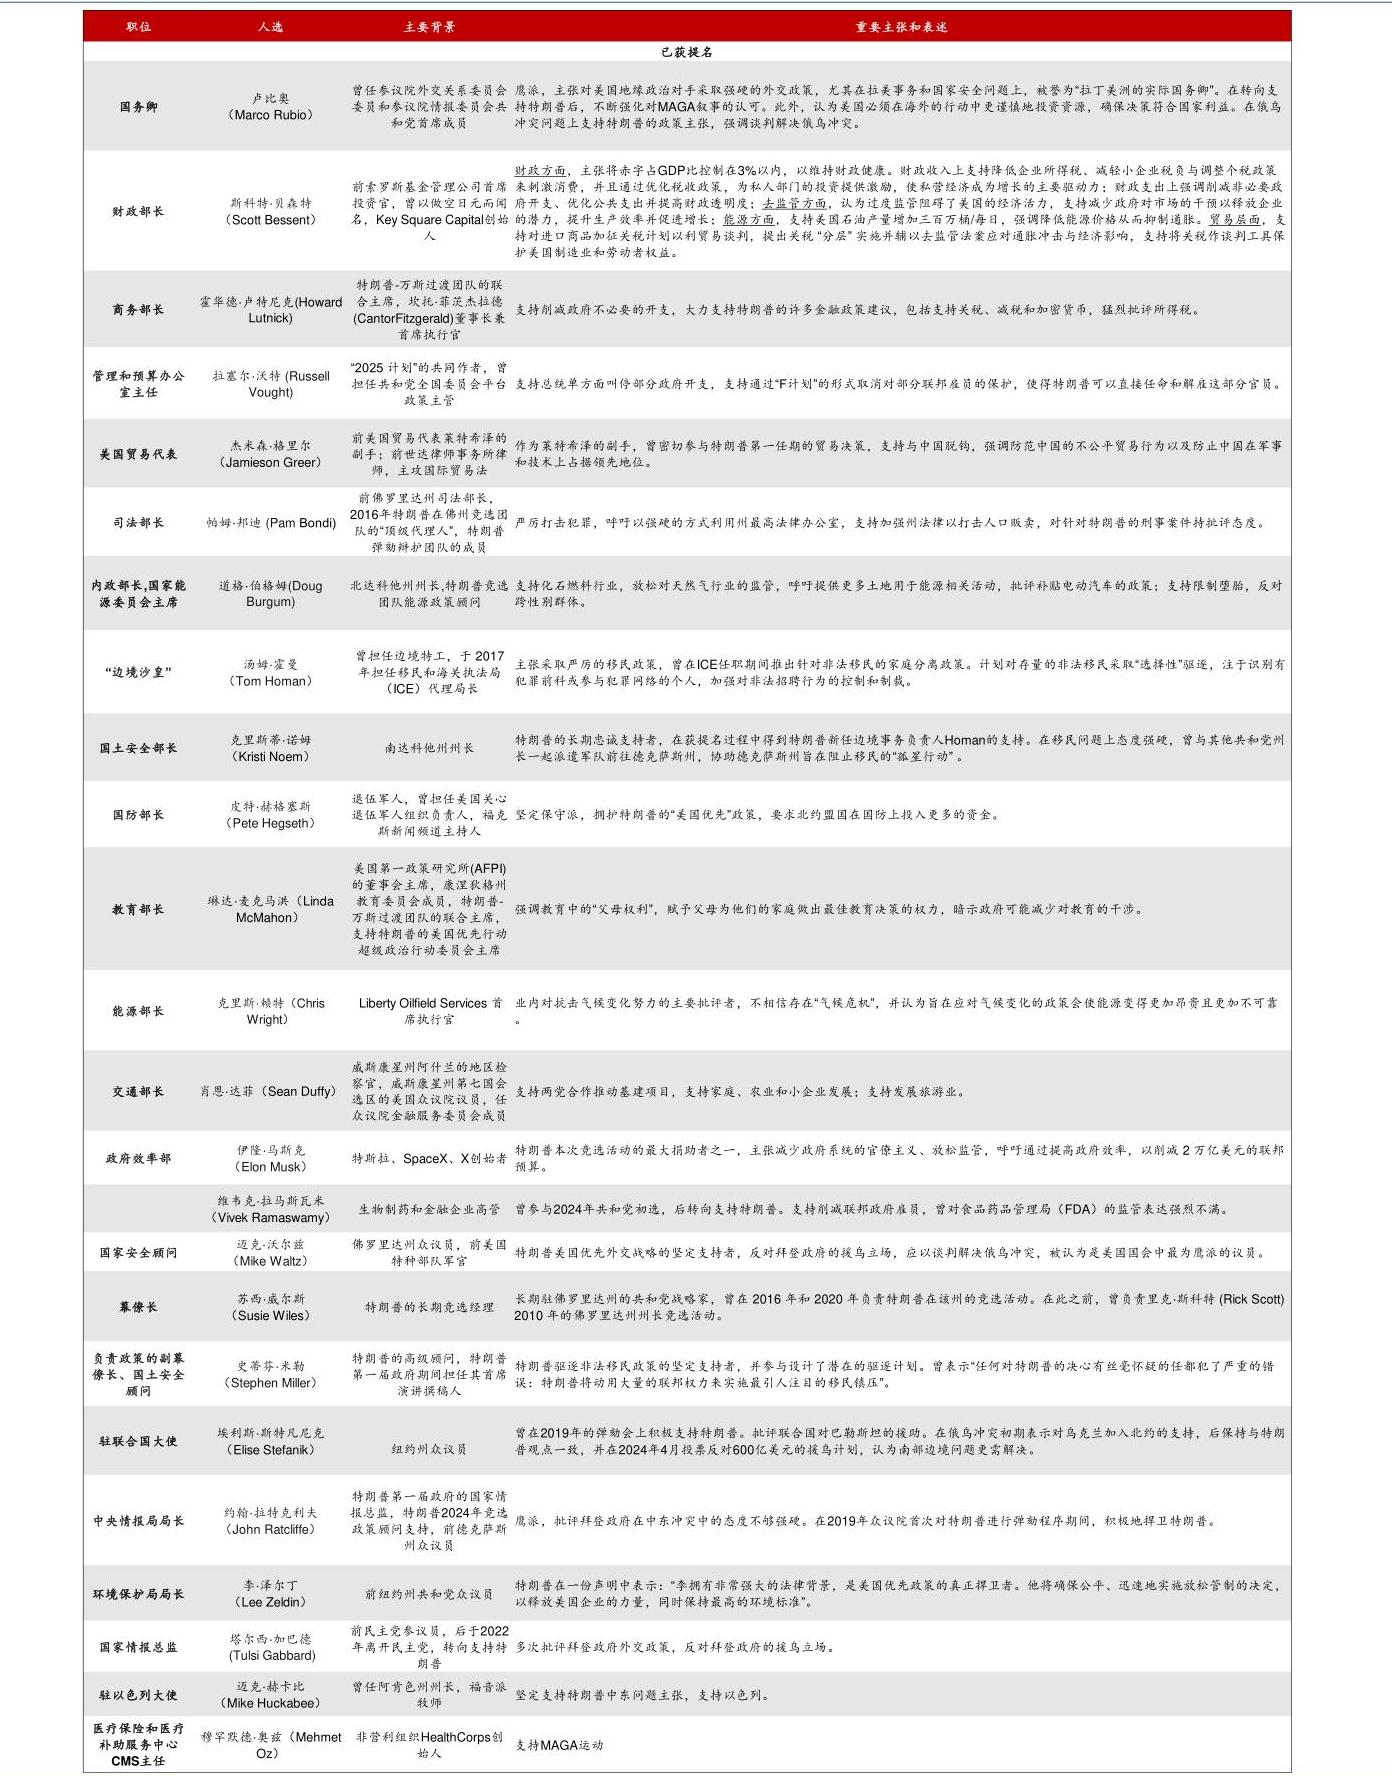
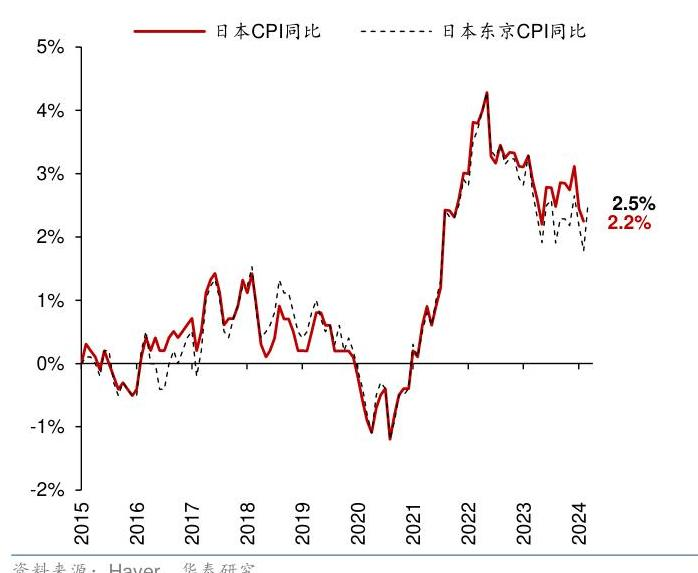
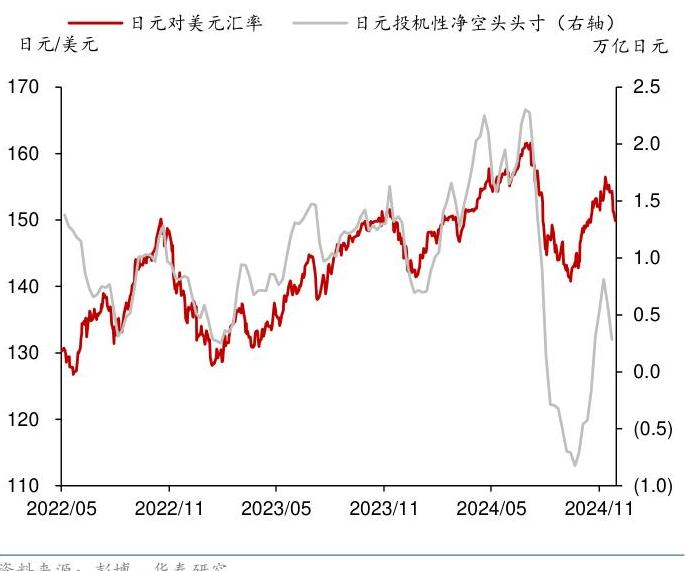

In [16]:
response_dict


In [ ]:
from mistralai.models import OCRResponse
from IPython.display import Markdown, display

def replace_images_in_markdown(markdown_str: str, images_dict: dict) -> str:
    for img_name, base64_str in images_dict.items():
        markdown_str = markdown_str.replace(f"![{img_name}]({img_name})", f"![{img_name}]({base64_str})")
    return markdown_str

def get_combined_markdown(ocr_response: OCRResponse) -> str:
  markdowns: list[str] = []
  for page in ocr_response.pages:
    image_data = {}
    for img in page.images:
      image_data[img.id] = img.image_base64
    markdowns.append(replace_images_in_markdown(page.markdown, image_data))

  return "\n\n".join(markdowns)

display(Markdown(get_combined_markdown(pdf_response)))

- And Image files...

In [ ]:
image_file = Path("receipt.png")
assert image_file.is_file()

In [ ]:
import base64

encoded = base64.b64encode(image_file.read_bytes()).decode()
base64_data_url = f"data:image/jpeg;base64,{encoded}"

image_response = client.ocr.process(document=ImageURLChunk(image_url=base64_data_url), model="mistral-ocr-latest")

response_dict = json.loads(image_response.json())
json_string = json.dumps(response_dict, indent=4)
print(json_string)

We want to be able to extract structured data from these files. For this, we will make use of `pixtral-12b-latest` and support it with our OCR model for better, high-quality answers.

In [ ]:
image_ocr_markdown = image_response.pages[0].markdown

chat_response = client.chat.complete(
    model="pixtral-12b-latest",
    messages=[
        {
            "role": "user",
            "content": [
                ImageURLChunk(image_url=base64_data_url),
                TextChunk(text=f"This is image's OCR in markdown:\n<BEGIN_IMAGE_OCR>\n{image_ocr_markdown}\n<END_IMAGE_OCR>.\nConvert this into a sensible structured json response. The output should be strictly be json with no extra commentary")
            ],
        },
    ],
    response_format =  {"type": "json_object"},
    temperature=0
)

response_dict = json.loads(chat_response.choices[0].message.content)
json_string = json.dumps(response_dict, indent=4)
print(json_string)

Note: We are leveraging a model already capable of vision tasks. However, we could also use text-only models for the structured output.

In [ ]:
image_ocr_markdown = image_response.pages[0].markdown

chat_response = client.chat.complete(
    model="ministral-8b-latest",
    messages=[
        {
            "role": "user",
            "content": f"This is image's OCR in markdown:\n<BEGIN_IMAGE_OCR>\n{image_ocr_markdown}\n<END_IMAGE_OCR>.\nConvert this into a sensible structured json response. The output should be strictly be json with no extra commentary"
        },
    ],
    response_format =  {"type": "json_object"},
    temperature=0
)

response_dict = json.loads(chat_response.choices[0].message.content)
json_string = json.dumps(response_dict, indent=4)
print(json_string)

### All Together
Let's design a simple function that takes an `image_path` file and returns a JSON structured output in a specific format. In this case, we arbitrarily decided we wanted an output respecting the following:

```python
class StructuredOCR:
    file_name: str  # can be any string
    topics: list[str]  # must be a list of strings
    languages: list[Language]  # a list of languages
    ocr_contents: dict  # any dictionary, can be freely defined by the model
```

We will make use of [custom structured outputs](https://docs.mistral.ai/capabilities/structured-output/custom_structured_output/) as well as `pycountry` for the languages.

In [ ]:
!pip install pycountry

In [ ]:
from enum import Enum
from pathlib import Path
from pydantic import BaseModel
import base64
import pycountry

languages = {lang.alpha_2: lang.name for lang in pycountry.languages if hasattr(lang, 'alpha_2')}

class LanguageMeta(Enum.__class__):
    def __new__(metacls, cls, bases, classdict):
        for code, name in languages.items():
            classdict[name.upper().replace(' ', '_')] = name
        return super().__new__(metacls, cls, bases, classdict)

class Language(Enum, metaclass=LanguageMeta):
    pass

class StructuredOCR(BaseModel):
    file_name: str
    topics: list[str]
    languages: list[Language]
    ocr_contents: dict

print(StructuredOCR.schema_json())

def structured_ocr(image_path: str) -> StructuredOCR:
    image_file = Path(image_path)
    assert image_file.is_file(), "The provided image path does not exist."

    # Read and encode the image file
    encoded_image = base64.b64encode(image_file.read_bytes()).decode()
    base64_data_url = f"data:image/jpeg;base64,{encoded_image}"

    # Process the image using OCR
    image_response = client.ocr.process(document=ImageURLChunk(image_url=base64_data_url), model="mistral-ocr-latest")
    image_ocr_markdown = image_response.pages[0].markdown

    # Parse the OCR result into a structured JSON response
    chat_response = client.chat.parse(
        model="pixtral-12b-latest",
        messages=[
            {
                "role": "user",
                "content": [
                    ImageURLChunk(image_url=base64_data_url),
                    TextChunk(text=(
                        "This is the image's OCR in markdown:\n"
                        f"<BEGIN_IMAGE_OCR>\n{image_ocr_markdown}\n<END_IMAGE_OCR>.\n"
                        "Convert this into a structured JSON response with the OCR contents in a sensible dictionnary."
                    ))
                ],
            },
        ],
        response_format=StructuredOCR,
        temperature=0
    )

    return chat_response.choices[0].message.parsed

We can now extract structured output from any image parsed with our OCR model.

In [ ]:
image_path = "receipt.png"
structured_response = structured_ocr(image_path)

response_dict = json.loads(structured_response.json())
json_string = json.dumps(response_dict, indent=4)
print(json_string)

The original image for comparison can be found below.

In [ ]:
from PIL import Image

image = Image.open(image_path)
image